1-1. 載入所需的套件 pandas, matplotlib, numpy, 

In [1]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import collections
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.get_configdir()

'C:\\Users\\user\\.matplotlib'

In [3]:
matplotlib.font_manager.FontProperties().get_family()


['sans-serif']

In [4]:
from matplotlib.font_manager import findfont, FontProperties
matplotlib.rcParams['font.sans-serif'] = 'HanWangHeiHeavy'
findfont(FontProperties(family=FontProperties().get_family()))

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\wt014.ttf'

1-2. 載入資料學測資料檔 exam_xc.csv 存為變數 examxc

In [5]:
exam = pd.read_csv('exam_xc.csv')
exam.head()

,QID,代號,來源,類別,年份,題型,題號,題目簡述,答案,章節,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
0,28617.0,sdcxc-ma091-1-01ax,學測數學091,學測數學,91,單選,1,到兩點距離和,(A),msseq 二次曲線,...,82.0,0.0,0.0,8.0,10.0,25.0,3.0,4.0,19.0,50.0
1,28632.0,sdcxc-ma091-1-02ax,學測數學091,學測數學,91,單選,2,樹的直徑,(B),msckx 數學綜合概念,...,1.0,2.0,84.0,12.0,1.0,3.0,15.0,17.0,37.0,28.0
2,28648.0,sdcxc-ma091-1-03ax,學測數學091,學測數學,91,單選,3,向量和為零向量,(C),msspx 平面向量,...,2.0,8.0,15.0,4.0,71.0,8.0,26.0,39.0,17.0,9.0
3,28792.0,sdcxc-ma091-1-04ax,學測數學091,學測數學,91,單選,4,常態分佈與數學成績,(B),msdsp 隨機變數,...,2.0,1.0,1.0,89.0,7.0,56.0,9.0,9.0,16.0,10.0
4,28794.0,sdcxc-ma091-1-05ax,學測數學091,學測數學,91,單選,5,函數圖形的配對,(D),msckx 數學綜合概念,...,7.0,5.0,14.0,64.0,10.0,28.0,24.0,21.0,12.0,15.0


1-3. 刪除 QID 欄，且將代號設為 index

In [6]:
del exam["QID"]

In [7]:
exam = exam.set_index(["代號"])
exam.head()

,來源,類別,年份,題型,題號,題目簡述,答案,章節,章節（短）,P,...,HA,HB,HC,HD,HE,LA,LB,LC,LD,LE
代號,,,,,,,,,,,,,,,,,,,,,
sdcxc-ma091-1-01ax,學測數學091,學測數學,91,單選,1,到兩點距離和,(A),msseq 二次曲線,二次曲線,76,...,82.0,0.0,0.0,8.0,10.0,25.0,3.0,4.0,19.0,50.0
sdcxc-ma091-1-02ax,學測數學091,學測數學,91,單選,2,樹的直徑,(B),msckx 數學綜合概念,數學綜合概,51,...,1.0,2.0,84.0,12.0,1.0,3.0,15.0,17.0,37.0,28.0
sdcxc-ma091-1-03ax,學測數學091,學測數學,91,單選,3,向量和為零向量,(C),msspx 平面向量,平面向量,62,...,2.0,8.0,15.0,4.0,71.0,8.0,26.0,39.0,17.0,9.0
sdcxc-ma091-1-04ax,學測數學091,學測數學,91,單選,4,常態分佈與數學成績,(B),msdsp 隨機變數,隨機變數,35,...,2.0,1.0,1.0,89.0,7.0,56.0,9.0,9.0,16.0,10.0
sdcxc-ma091-1-05ax,學測數學091,學測數學,91,單選,5,函數圖形的配對,(D),msckx 數學綜合概念,數學綜合概,52,...,7.0,5.0,14.0,64.0,10.0,28.0,24.0,21.0,12.0,15.0


##### 2.1 分別計算 單選, 多選, 填充的數量

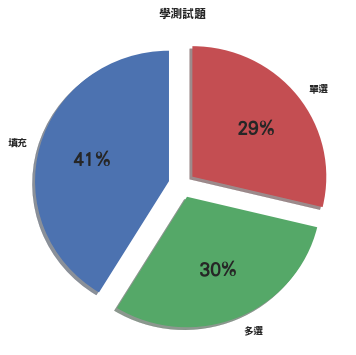

In [8]:
quesType = exam[u"題型"]
quesTypeCounts = quesType.value_counts()
plt.figure(figsize=(6,6))
font = {'size':18}
matplotlib.rc('font',**font)
plt.pie(quesTypeCounts,labels = quesTypeCounts.index, 
        autopct="%2.0f%%",shadow=True,startangle=90,
        explode=(0.1,0.1,0.1))
plt.title(u"學測試題")

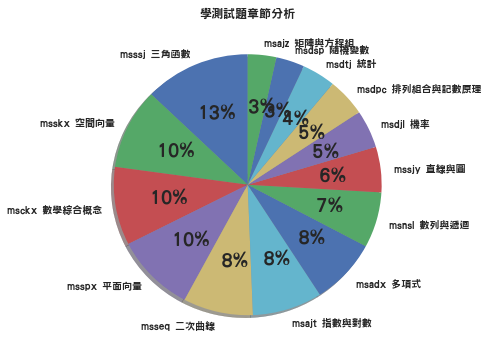

In [9]:
chapType = exam["章節"]
chapTypeCounts = chapType.value_counts()
plt.figure(figsize=(6,6))
font = {'size':18}
matplotlib.rc('font',**font)
plt.pie(chapTypeCounts,labels = chapTypeCounts.index, 
        autopct="%2.0f%%",shadow=True,startangle=90)
plt.title(u"學測試題章節分析")

將 單選, 多選, 填充 分成三個表 singCho, multCho, textBox

In [10]:
singCho = exam[exam["題型"].isin(['單選'])]
multCho = exam[exam["題型"] =='多選']
textBox = exam[exam.題型.isin(['填充'])]

In [11]:
singChoAns = singCho[["答案","P"]].groupby(by = "答案").count()
singChoAns.columns.values[0]="題數"
singChoAns["百分比"]= singChoAns["題數"]/len(singCho)
singChoAns

,題數,百分比
答案,,
(A),14,0.152174
(B),22,0.239130
(C),18,0.195652
(D),23,0.250000
(E),15,0.163043


In [12]:
multChoAns = multCho[["答案","P"]].groupby(by = "答案").count()
multChoAns.columns.values[0]="題數"
multChoAns.sort_values("題數",ascending=False)

,題數
答案,
(B)(C)(D),7
(D)(E),7
(A)(B)(E),7
(A)(C)(E),6
(A)(B),5
(C)(D),5
(A)(B)(D),5
(A)(B)(D)(E),5
(B)(E),5


In [13]:
multChoAns.reset_index(inplace=True)
multChoAns["答案個數"]=multChoAns["答案"].apply(lambda x: round(len(x)/3),0)
multChoAnsNum = multChoAns.groupby("答案個數").sum()
multChoAnsNum["百分比"]=multChoAnsNum["題數"]/len(multCho)
multChoAnsNum

,題數,百分比
答案個數,,
1,3,0.031250
2,40,0.416667
3,39,0.406250
4,12,0.125000
5,2,0.020833


計算三種題型在不同群體的答對率

In [14]:
ansRatebyType = exam.groupby("題型").mean().round(2)
ansRatebyType.iloc[:,0:16]

,年份,P,Ph,Pm,Pl,P90,P70,P50,P30,P10,T,D,D1,D2,D3,D4
題型,,,,,,,,,,,,,,,,
單選,98.70,50.53,75.51,50.80,25.28,81.70,63.76,50.82,37.54,18.70,NaN,50.23,17.93,12.95,13.27,18.85
填充,98.27,33.94,64.50,29.23,8.08,74.29,46.15,28.98,15.34,4.68,NaN,56.42,28.14,17.17,13.64,10.66
多選,98.62,40.80,64.81,38.41,19.19,71.82,51.72,38.29,26.82,15.28,25.28,45.62,20.10,13.43,11.47,11.54


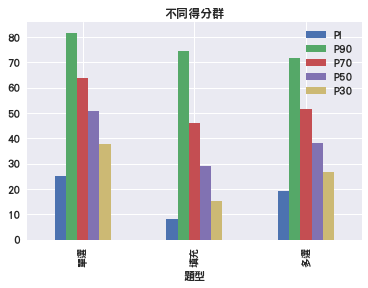

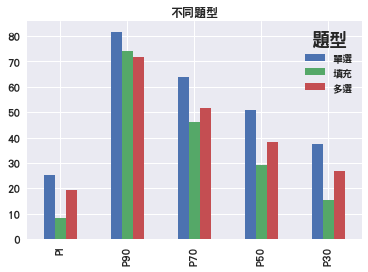

In [15]:
ansRatebyTypeGroup5 =  ansRatebyType.iloc[:,4:9]
ansRatebyTypeGroup5
ansRatebyTypeGroup5.plot.bar(title="不同得分群")
ansRatebyTypeGroup5.T.plot.bar(title="不同題型")

In [16]:
exambyYearType = exam.groupby(["來源","題型"]).count().iloc[:,0:1]
exambyYearType.columns.values[0]="題數"
exambyYearType.head(3)

題數
來源      題型    
學測數學091 單選   6
        填充   8
        多選   6

In [17]:
exambyYearType.unstack().T

來源     學測數學091  學測數學092  學測數學093  學測數學094  學測數學095  學測數學096  學測數學097  學測數學098  \
   題型                                                                           
題數 單選        6        5        6        5        5        5        5        6   
   填充        8        9        9        9        9        9        8        9   
   多選        6        6        5        6        6        6        7        5   

來源     學測數學099  學測數學100  學測數學101  學測數學102  學測數學103  學測數學104  學測數學105  學測數學106  
   題型                                                                          
題數 單選        7        6        7        6        6        4        6        7  
   填充        8        7        7        8        8       10        7        7  
   多選        5        7        6        6        6        6        7        6

In [18]:
exambyChapter = exam.groupby("章節")
exambyChapter = exambyChapter.agg({"來源":"count","P":"mean","Ph":"mean","Pm":"mean","Pl":"mean","P90":"mean"})
exambyChapter.sort_values(by="來源",ascending=False)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msssj 三角函數,41,37.390244,66.975610,32.219512,12.975610,76.170732
msskx 空間向量,32,35.875000,64.718750,30.593750,12.312500,74.500000
msckx 數學綜合概念,31,54.000000,78.161290,56.387097,27.451613,83.419355
msspx 平面向量,31,38.290323,68.903226,33.612903,12.354839,78.129032
msajt 指數與對數,27,40.407407,68.481481,37.185185,15.555556,76.666667
msseq 二次曲線,27,34.111111,60.407407,29.592593,12.333333,69.407407
msadx 多項式,26,39.884615,66.346154,37.692308,15.615385,74.307692
msnsl 數列與遞迴,22,53.863636,77.772727,56.227273,27.590909,82.545455
mssjy 直線與圓,18,37.333333,67.166667,32.722222,12.111111,76.222222


In [19]:
exambyChapter.sort_values(by="P90",ascending=True)

,來源,P,Ph,Pm,Pl,P90
章節,,,,,,
msdsp 隨機變數,11,36.000000,57.727273,35.181818,15.090909,64.545455
msajz 矩陣與方程組,11,34.000000,58.909091,32.000000,11.090909,66.636364
msseq 二次曲線,27,34.111111,60.407407,29.592593,12.333333,69.407407
msdpc 排列組合與記數原理,15,41.200000,65.000000,40.133333,18.466667,71.733333
msadx 多項式,26,39.884615,66.346154,37.692308,15.615385,74.307692
msskx 空間向量,32,35.875000,64.718750,30.593750,12.312500,74.500000
msdtj 統計,13,46.384615,69.769231,47.230769,22.153846,75.461538
msdjl 機率,15,40.466667,67.800000,37.733333,15.866667,75.866667
msssj 三角函數,41,37.390244,66.975610,32.219512,12.975610,76.170732


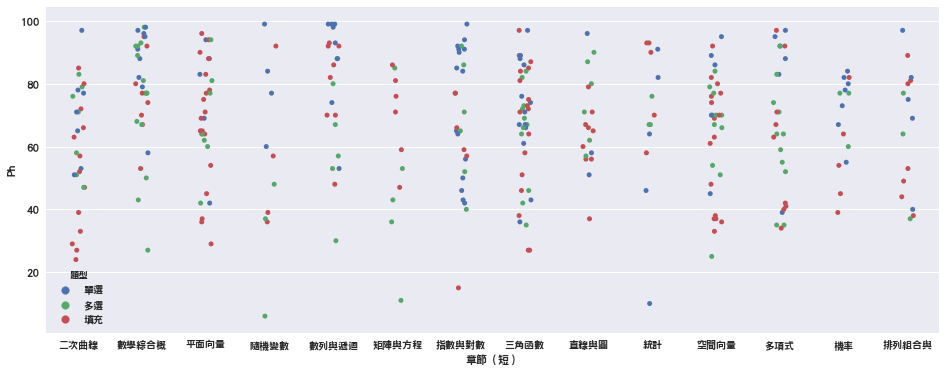

In [20]:
#exam["短章"]= exam["章節"].apply(lambda x: x.str)
plt.figure(figsize=(16,6))
font = {'size':24}
matplotlib.rc('font',**font)
sns.stripplot(x="章節（短）",y="Ph",data=exam,hue="題型",jitter=True)